In [ ]:
#Задача1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# 1. Загрузка данных
train_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster25/archive1/train_dataset.csv"
test_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster25/archive1/test_dataset.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


print("Train Dataset Sample:\n", train_df.head())
print("Test Dataset Sample:\n", test_df.head())

Train Dataset Sample:
    age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0 

Train Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin     

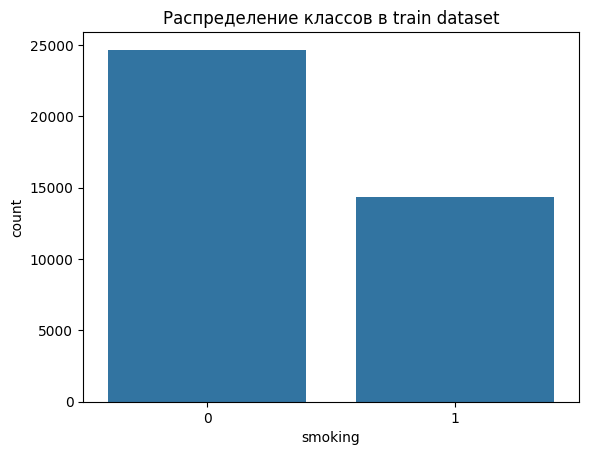

In [3]:
# 2. EDA (Исследовательский анализ данных)
print("Train Dataset Info:\n")
print(train_df.info())
print("\nMissing Values in Train Dataset:\n", train_df.isnull().sum())

# Проверка сбалансированности классов
sns.countplot(x=train_df.iloc[:, -1]) 
plt.title("Распределение классов в train dataset")
plt.show()


In [4]:
# 3. Предобработка данных
# Разделение признаков и целевой переменной
y = train_df.iloc[:, -1]  
X = train_df.iloc[:, :-1]  

# Разделение данных 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
# 4. Обучение RandomForestClassifier с подбором гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


print("Лучшие параметры:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [8]:
# 5. Оценка качества классификации
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
roc_auc = roc_auc_score(y_val, best_rf.predict_proba(X_val)[:, 1])


print("\nМетрики качества классификации:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")




Метрики качества классификации:
Accuracy: 0.7976
Precision: 0.7975
Recall: 0.7976
F1 Score: 0.7976
ROC AUC: 0.8851


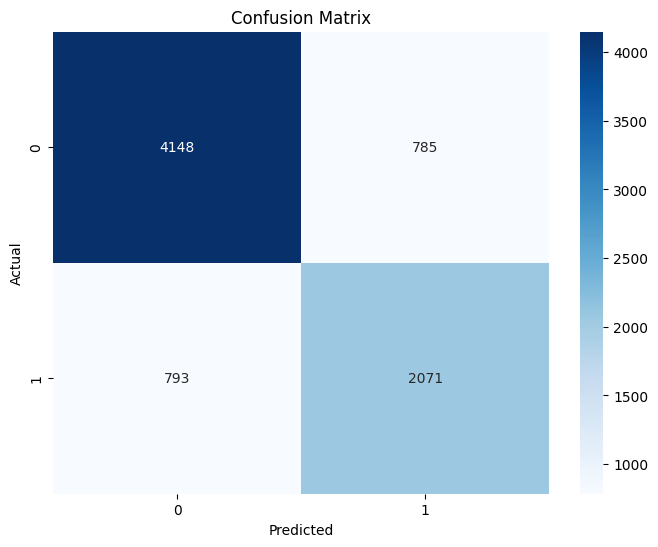

In [9]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
#Задача2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1) Загрузка данных
train_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster25/archive2/train.csv"
test_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster25/archive2/test.csv"
submission_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster25/archive2/sample_submission.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


print(train_df.head())

   id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Pol

In [3]:
# 2) EDA - Исследовательский анализ данных
# Анализ пропущенных значений
missing_values = train_df.isnull().sum() / len(train_df) * 100
print("Пропущенные значения в %:")
print(missing_values[missing_values > 0])


print(train_df.describe())

Пропущенные значения в %:
Age                      1.558750
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Occupation              29.839583
Health Score             6.173000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Customer Feedback        6.485333
dtype: float64
                 id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e

In [5]:
# 3) Предобработка данных
# Заполняем пропущенные значения средними значениями для числовых признаков
num_features = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_features.remove("id")  
train_df[num_features] = train_df[num_features].fillna(train_df[num_features].mean())

# Кодирование категориальных признаков 
cat_features = train_df.select_dtypes(include=['object']).columns.tolist()
cat_features.remove("Policy Start Date")  

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cat = encoder.fit_transform(train_df[cat_features])
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features))

# Объединяем числовые и категориальные признаки
train_df = pd.concat([train_df[num_features], encoded_df], axis=1)

In [6]:
# 4) Разделение на обучающую и тестовую выборку
y = train_df["Premium Amount"]
X = train_df.drop(columns=["Premium Amount"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 5) Обучение модели Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [8]:
# 6) Оценка качества модели
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

MAE: 651.336478875
MSE: 721612.510163433
RMSE: 849.4777867392608
R^2 Score: 0.034355106585263306


In [9]:
# 7) Подбор гиперпараметров с GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")


Лучшие параметры: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [10]:
# Оценка модели с подобранными параметрами
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Оптимизированная модель - MAE: {mae_best}")
print(f"Оптимизированная модель - MSE: {mse_best}")
print(f"Оптимизированная модель - RMSE: {rmse_best}")
print(f"Оптимизированная модель - R^2 Score: {r2_best}")


Оптимизированная модель - MAE: 633.2664217908593
Оптимизированная модель - MSE: 704308.817914523
Оптимизированная модель - RMSE: 839.2310873141694
Оптимизированная модель - R^2 Score: 0.05751050068118313
